# Action2新闻内容自动提取及呈现  

输入任意的新闻网址，对其进行：     
1）抓取正文内容，对非中文内容进行清洗     
2）文章关键词     
3）文章摘要，即关键句     
4）词云可视化

In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


In [17]:
import requests
from bs4 import BeautifulSoup
from textrank4zh import TextRank4Keyword, TextRank4Sentence

In [6]:
# 请求
url = 'https://mbd.baidu.com/newspage/data/landingsuper?context=%7B%22nid%22%3A%22news_9820812342883668916%22%7D&n_type=0&p_from=1'

In [7]:
html = requests.get(url, timeout=10)
content = html.content
print(content)

b'<!Doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml"><head><meta charset="utf-8"/><meta name="referrer" content="always"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no"><link rel="shortcut icon" href="https://gss0.bdstatic.com/5bd1bjqh_Q23odCf/static/wiseindex/img/favicon64.ico" type="image/x-icon"><link rel="apple-touch-icon-precomposed" href="https://gss0.bdstatic.com/5bd1bjqh_Q23odCf/static/wiseindex/img/screen_icon_new.png"><title>\xe9\x92\x9f\xe5\x8d\x97\xe5\xb1\xb1\xe6\x9c\x80\xe6\x96\xb0\xe7\xa0\x94\xe5\x88\xa4\xef\xbc\x9a3\xe6\x9c\x88\xe5\x90\x8e\xe7\x96\xab\xe6\x83\x85\xe4\xb8\x8b\xe9\x99\x8d\xef\xbc\x8c\xe5\x86\x9c\xe6\x9d\x91\xe8\xbf\x87\xe5\xb9\xb4\xe8\xa6\x81\xe6\xb3\xa8\xe6\x84\x8f\xe8\xbf\x99\xe4\xba\x9b</title><link rel="stylesheet" href="https://mbdp01.bdstatic.com/static/superlanding/css/land_min_pack_7c91461.css"><meta itemp

In [9]:
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()

In [10]:
print(text)


钟南山最新研判：3月后疫情下降，农村过年要注意这些百度首页登录个人中心帐号设置意见反馈退出钟南山最新研判：3月后疫情下降，农村过年要注意这些长安街知事发布时间：01-3112:42北京日报报业集团1月31日，“助力基层疫情防控万里行”活动在广州启动，钟南山院士现场解答了春节期间基层防疫的相关问题。农村地区春节期间要注意这些钟南山表示，农村地区现在是疫情防控的重中之重，从最近发病的情况看起来，60%到70%的疫情发生在农村。如何做好防疫？他提出三大方面。一、减少人员的聚集钟南山介绍，温度、生存环境都影响着病毒生长，天气冷是病毒生长传播的好机会，这种情况下，聚集的人多，病毒传播会更迅速。黑龙江此次的疫情就是这种情况。钟南山二、提高防控知识的普及率1、提高老百姓的认知钟南山表示，很多农村基层普通老百姓都以为，感染新冠病毒就会有很严重的症状，就必须要住院，所以当他有简单症状时，比如头疼脑热时并不引起重视，以为是流感吃点药就抗过去了。但实际上大多数新冠肺炎患者都是轻症的，甚至很多是无症状患者。因为新冠病毒的传播率很强，因此生病后不就医而是硬扛，最终就会导致耽误了自己，传染了他人。2、提高村医的警惕性钟南山提醒，对于农村地区的防疫，还要村医有警惕性，不要有人来看病，就给吃点退烧药、中药就行了。一但患者有头疼、嗓子疼，或者是发烧、非常疲劳的症状，就必须要求患者做核酸检测。三、帮助老百姓方便快速检测核酸钟南山指出，希望解决老百姓核酸检测不方便的问题。有的农村全村人集合坐着大巴到县城去检测，既花费时间又容易交叉感染，应采用移动车到村里应检尽检，不要让老百姓兴师动众，这是一个非常重要的科技体现。新冠肺炎有一个特点跟SARS不一样，就是即便感染了病毒也可能没有症状，但没症状也有明显的传染性。因此春节期间，在农村的老百姓一定要：1、少串门、少聚会；2、不舒服一定要去看病，不要等病情厉害了再看；3、及时做核酸检查。3月后疫情可能开始下降目前，全球感染新冠肺炎的人数已经突破1亿。对于未来疫情的形势，钟南山表示，有很多国家开始打疫苗了。打了疫苗，无论疗效高还是低，肯定是有效的。目前，中国有两个疫苗是正式的，还有好几个在临床三期观察。随着打疫苗的数量越来越多，患病的情况会改善。由于疫苗产生抗体有一个过程，大概需要30至35天，才会产生比较明显的保护作用。“在积极地增加疫苗的情况下，积极地管控的情

In [11]:
# 词性
import jieba.posseg as pseg
# 获取人物、地点
words = pseg.lcut(text)
# 人物集合
news_person = {word for word, flag in words if flag=='nr'}
news_place = {word for word, flag in words if flag=='ns'}
print('新闻中的人物有：', news_person)
print('新闻中的地点有：', news_place)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\25033\AppData\Local\Temp\jieba.cache
Loading model cost 1.302 seconds.
Prefix dict has been built successfully.


新闻中的人物有： {'王清宪', '万里行', '安全性', '胡昌', '康复'}
新闻中的地点有： {'钟南山', '广州', '京', '长安街', '余国', '中国', '河北', '吉林', '黑龙江'}


In [12]:
# 只提取中文和相关标点符号
import re
text = re.sub('[^[\u4e00-\u9fa5。，！：、]{3,}', '', text) # 个数判断
text

'\n钟南山最新研判：3月后疫情下降，农村过年要注意这些百度首页登录个人中心帐号设置意见反馈退出钟南山最新研判：3月后疫情下降，农村过年要注意这些长安街知事发布时间：北京日报报业集团1月31日，“助力基层疫情防控万里行”活动在广州启动，钟南山院士现场解答了春节期间基层防疫的相关问题。农村地区春节期间要注意这些钟南山表示，农村地区现在是疫情防控的重中之重，从最近发病的情况看起来，到的疫情发生在农村。如何做好防疫？他提出三大方面。一、减少人员的聚集钟南山介绍，温度、生存环境都影响着病毒生长，天气冷是病毒生长传播的好机会，这种情况下，聚集的人多，病毒传播会更迅速。黑龙江此次的疫情就是这种情况。钟南山二、提高防控知识的普及率1、提高老百姓的认知钟南山表示，很多农村基层普通老百姓都以为，感染新冠病毒就会有很严重的症状，就必须要住院，所以当他有简单症状时，比如头疼脑热时并不引起重视，以为是流感吃点药就抗过去了。但实际上大多数新冠肺炎患者都是轻症的，甚至很多是无症状患者。因为新冠病毒的传播率很强，因此生病后不就医而是硬扛，最终就会导致耽误了自己，传染了他人。2、提高村医的警惕性钟南山提醒，对于农村地区的防疫，还要村医有警惕性，不要有人来看病，就给吃点退烧药、中药就行了。一但患者有头疼、嗓子疼，或者是发烧、非常疲劳的症状，就必须要求患者做核酸检测。三、帮助老百姓方便快速检测核酸钟南山指出，希望解决老百姓核酸检测不方便的问题。有的农村全村人集合坐着大巴到县城去检测，既花费时间又容易交叉感染，应采用移动车到村里应检尽检，不要让老百姓兴师动众，这是一个非常重要的科技体现。新冠肺炎有一个特点跟不一样，就是即便感染了病毒也可能没有症状，但没症状也有明显的传染性。因此春节期间，在农村的老百姓一定要：1、少串门、少聚会；2、不舒服一定要去看病，不要等病情厉害了再看；3、及时做核酸检查。3月后疫情可能开始下降目前，全球感染新冠肺炎的人数已经突破1亿。对于未来疫情的形势，钟南山表示，有很多国家开始打疫苗了。打了疫苗，无论疗效高还是低，肯定是有效的。目前，中国有两个疫苗是正式的，还有好几个在临床三期观察。随着打疫苗的数量越来越多，患病的情况会改善。由于疫苗产生抗体有一个过程，大概需要30至35天，才会产生比较明显的保护作用。“在积极地增加疫苗的情况下，积极地管控的情况下。可能3月份以后，我认为会开始有

In [13]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['这种','以后','因此']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [22]:
import jieba
from wordcloud import WordCloud 
# 词云展示
def create_word_cloud(f):
    f = remove_stop_words(f)
    seg_list = jieba.lcut(f)        # 结巴分词，得到list
    cut_text = " ".join(seg_list)   # 转换成string
    wc = WordCloud(
        max_words=100,
        width=700,
        height=520,
        font_path='./msyh.ttf'
    )
    wordcloud = wc.generate(cut_text)
    wordcloud.to_file("wordcloud.jpg")

In [23]:
# 关键词
create_word_cloud(text)

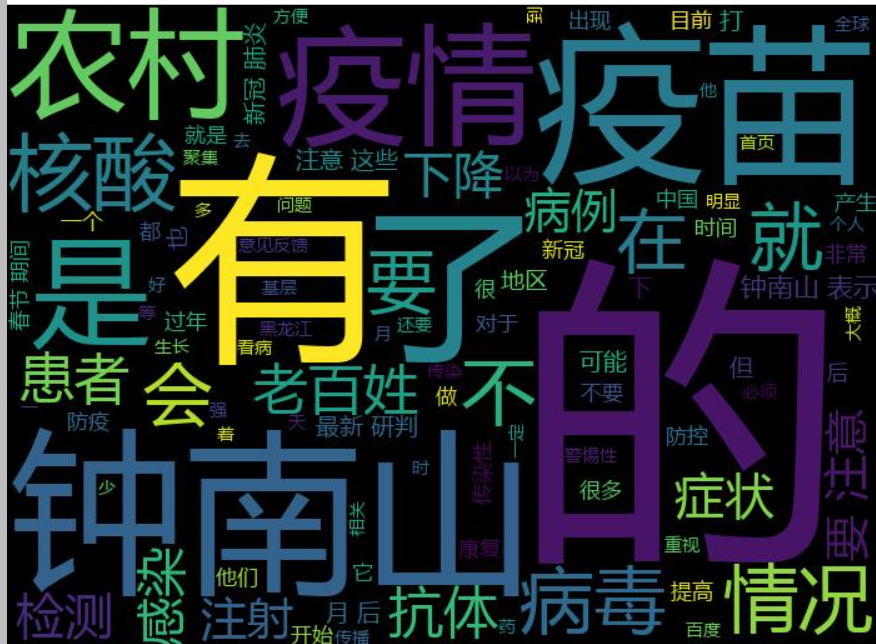

In [18]:
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(10, word_min_len=3):
    # 输出10个关键词和其重要性
    print(item.word, item.weight)


# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
    # index是句子在文中的下标，weight表示权重
    print(item.index, item.weight, item.sentence)

关键词：
钟南山 0.029285369798599088
老百姓 0.011030520310011928
客户端 0.006701430473133896
意见反馈 0.006126905219784798
党组书记 0.005061850662808542
传染性 0.00451385509007383
退烧药 0.004265850297505316
北京日报 0.003923941726572975
黑龙江 0.003888172234392279
黑龙江省政府 0.0035433425252896786
摘要：
35 0.04800842363397231 美一病例感染新冠十余月未痊愈 患者：我大部分时间下不了床钟南山：预计河北黑龙江吉林三地疫情2月份基本可控全球疫情形势严峻，中国疫苗成40余国“救命药”，钟南山预判真准钟南山最新研判
0 0.04482193214966679 钟南山最新研判：3月后疫情下降，农村过年要注意这些百度首页登录个人中心帐号设置意见反馈退出钟南山最新研判：3月后疫情下降，农村过年要注意这些长安街知事发布时间：北京日报报业集团1月31日，“助力基层疫情防控万里行”活动在广州启动，钟南山院士现场解答了春节期间基层防疫的相关问题
6 0.04340174276589392 钟南山二、提高防控知识的普及率1、提高老百姓的认知钟南山表示，很多农村基层普通老百姓都以为，感染新冠病毒就会有很严重的症状，就必须要住院，所以当他有简单症状时，比如头疼脑热时并不引起重视，以为是流感吃点药就抗过去了
